In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')


df = pd.read_excel('dataset')  
print(df.head()) 


                                               tweet      label
0  ya orospu cocuklari hepiniz niye ayni anda yaz...     nefret
1  Ciddiye alan tüm dünyanın beynini sileyim.. \n...  saldırgan
2  Kayıtlı İstihdama geçiş programına göre (?)\nŞ...    hiçbiri
3  Hastaneye git Suriyeli. PTT ye git Suriyeli. P...     nefret
4               Cölesi bitmiş suriyeli gibiyim bugün    hiçbiri


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer



labels = df['label']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

count_vectorizer = CountVectorizer(ngram_range=(1, 2))  
X = count_vectorizer.fit_transform(df['tweet'])

print("Sayısal Etiketler: ", y)
print("Sayısal Metin Verisi: ", X.toarray())


Sayısal Etiketler:  [1 2 0 ... 0 0 0]
Sayısal Metin Verisi:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
# Etiketlerin örnekleri
print(df['label'].value_counts())
# Etiketlerin anlamlarını öğrenmek için
print(label_encoder.classes_)

label
hiçbiri      7722
nefret       2336
saldırgan     166
Name: count, dtype: int64
['hiçbiri' 'nefret' 'saldırgan']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  
X_tfidf = tfidf_vectorizer.fit_transform(df['tweet'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape)


(8179, 245905) (2045, 245905)


In [5]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)


from sklearn.metrics import classification_report
print("Random Forest Modeli Sonuçları:")
print(classification_report(y_test, rf_pred))


Random Forest Modeli Sonuçları:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1527
           1       0.93      0.16      0.27       490
           2       0.00      0.00      0.00        28

    accuracy                           0.78      2045
   macro avg       0.57      0.39      0.38      2045
weighted avg       0.80      0.78      0.72      2045



In [6]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


xgb_pred = xgb_model.predict(X_test)


print("XGBoost Modeli Sonuçları:")
print(classification_report(y_test, xgb_pred))


XGBoost Modeli Sonuçları:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1527
           1       0.84      0.39      0.53       490
           2       0.67      0.29      0.40        28

    accuracy                           0.83      2045
   macro avg       0.78      0.55      0.61      2045
weighted avg       0.83      0.83      0.80      2045



In [7]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)

print("LightGBM Modeli Sonuçları:")
print(classification_report(y_test, lgb_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27601
[LightGBM] [Info] Number of data points in the train set: 8179, number of used features: 1189
[LightGBM] [Info] Start training from score -0.277827
[LightGBM] [Info] Start training from score -1.488549
[LightGBM] [Info] Start training from score -4.082071
LightGBM Modeli Sonuçları:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1527
           1       0.79      0.43      0.55       490
           2       0.89      0.29      0.43        28

    accuracy                           0.83      2045
   macro avg       0.84      0.56      0.63      2045
weighted avg       0.82      0.83      0.81      2045



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np
from scipy import sparse

# Dense yerine sparse matrix kullanımı
X_train_sparse = sparse.csr_matrix(X_train)  # Bellek verimliliği için sparse format
X_test_sparse = sparse.csr_matrix(X_test)

# ANN Modelini Oluştur
ann_model = Sequential()

# Katmanlar
ann_model.add(Dense(128, input_dim=X_train_sparse.shape[1], activation='relu'))
ann_model.add(Dropout(0.5))  
ann_model.add(BatchNormalization())
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.5))

# Çıkış Katmanı
ann_model.add(Dense(1, activation='sigmoid'))

# Modeli Derle
ann_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Dense array olmadan eğitmek için toarray() kullanmak yerine veri parçalayarak kullanın
batch_size = 32  # Mini-batch boyutu
num_epochs = 15

# Fit işlemi için generator kullanımı
def sparse_batch_generator(X, y, batch_size):
    num_samples = X.shape[0]
    while True:  # Sonsuz döngü (fit için gerekli)
        indices = np.arange(num_samples)
        np.random.shuffle(indices)  # Veriyi karıştır
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            X_batch = X[batch_indices].toarray()  # Sadece küçük parçayı dense yap
            y_batch = y[batch_indices]
            yield X_batch, y_batch

# Fit işlemi
history = ann_model.fit(
    sparse_batch_generator(X_train_sparse, y_train, batch_size),
    steps_per_epoch=X_train_sparse.shape[0] // batch_size,
    epochs=num_epochs,
    validation_data=(X_test_sparse.toarray(), y_test),
    callbacks=[early_stopping]
)

# Model Sonuçları
print("ANN Modeli Sonuçları:")
ann_pred = (ann_model.predict(X_test_sparse.toarray()) > 0.5).astype('int')
print(classification_report(y_test, ann_pred))


Epoch 1/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 83s 317ms/step - accuracy: 0.6772 - loss: 0.6236 - val_accuracy: 0.7467 - val_loss: 0.5422
Epoch 2/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 76s 299ms/step - accuracy: 0.8349 - loss: 0.3396 - val_accuracy: 0.8337 - val_loss: 0.3927
Epoch 3/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 76s 297ms/step - accuracy: 0.9025 - loss: 0.1563 - val_accuracy: 0.8337 - val_loss: 0.3654
Epoch 4/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 72s 282ms/step - accuracy: 0.9319 - loss: 0.0495 - val_accuracy: 0.8455 - val_loss: 0.4475
Epoch 5/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 74s 289ms/step - accuracy: 0.9220 - loss: -0.0884 - val_accuracy: 0.8386 - val_loss: 0.5445
Epoch 6/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 77s 301ms/step - accuracy: 0.9322 - loss: -0.4536 - val_accuracy: 0.8073 - val_loss: 0.9107
Epoch 7/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 76s 299ms/step - accuracy: 0.9242 - loss: -1.1787 - val_accuracy: 0.7917 - val_loss: 0.8031
Epoch 8/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 74s 288ms/step - accuracy: 0.9079 - loss

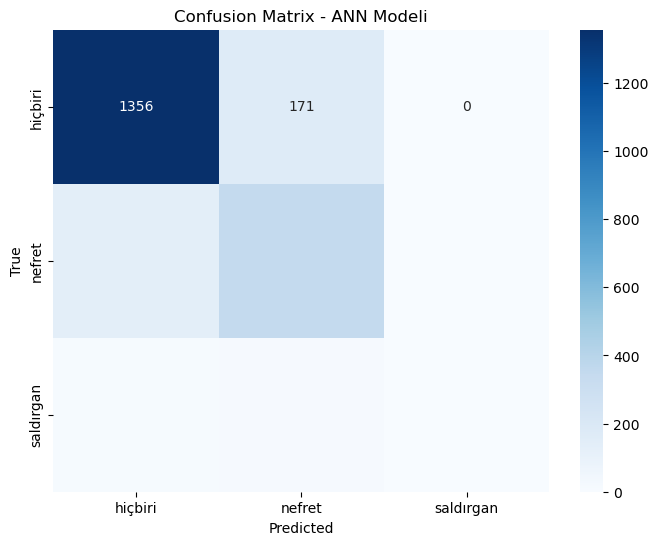

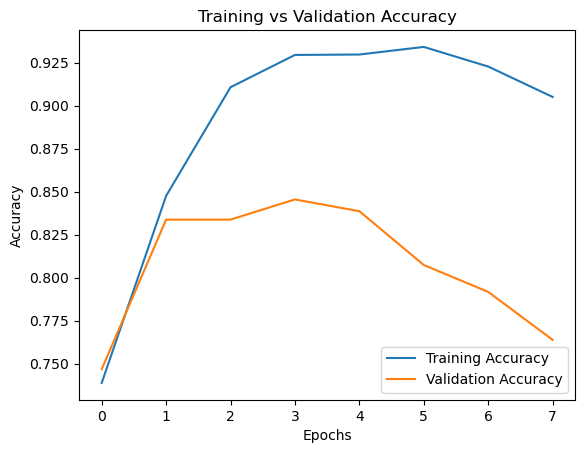

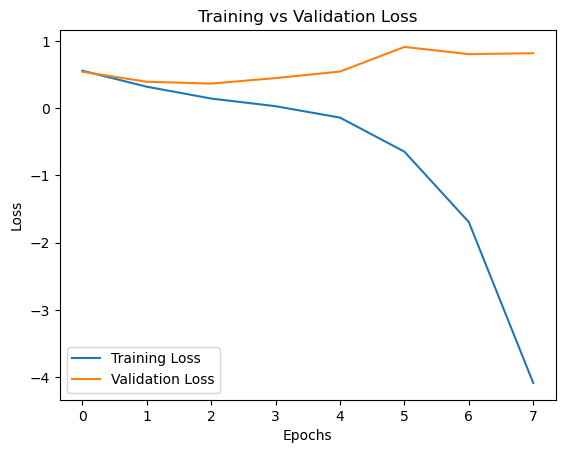

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, ann_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - ANN Modeli')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
